In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [4]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [5]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.515026,-0.173362,-2.935345,0.655095,1.043767,1
1,1.537174,-1.682370,-0.313622,0.492422,1.091323,1
2,-0.882487,0.827682,0.450042,-0.895122,-0.529684,0
3,3.518604,-4.712351,0.493437,4.309063,0.473681,1
4,-0.483185,0.361146,1.556349,-2.843239,-0.415726,0


In [6]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [7]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [8]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [13]:
df1 = combined_sampling(df, 0.5, 0.5)

C:\Users\sudip\AppData\Local\Temp\ipykernel_4340\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [14]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\sudip\AppData\Local\Temp\ipykernel_4340\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\sudip\AppData\Local\Temp\ipykernel_4340\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col4', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')


In [17]:
df3

,col4,col1,target
19,-1.023664,-0.562888,0
33,-0.911748,0.952448,1
9,-3.179437,0.657884,0
58,-0.343168,-1.254820,0
54,1.312253,-0.877622,1
1,0.492422,1.537174,1
4,-2.843239,-0.483185,0
31,1.404805,-0.333207,0
17,0.957671,2.025257,1
93,-2.782208,-1.191605,0


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [19]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [22]:
clf = DecisionTreeClassifier(
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,  # This is the correct parameter to use
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=None,
    splitter='best'
)

In [23]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9166666666666666, 'x[0] <= -0.18\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.25, 0.75, 'x[1] <= -0.809\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.375, 0.5833333333333334, 'x[1] <= -0.532\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.4166666666666667, 'x[0] <= -1.242\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.625, 0.25, 'x[0] <= -0.57\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.75, 'x[1] <= -1.988\ngini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(0.625, 0.8333333333333333, '  False'),
 Text(0.625, 

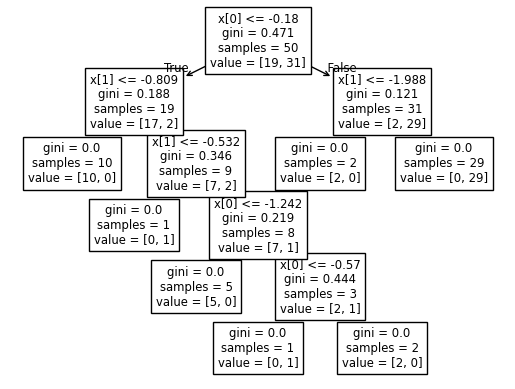

In [24]:
plot_tree(clf1)

[Text(0.4583333333333333, 0.9, 'x[1] <= 0.13\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.25, 0.7, 'x[0] <= 1.602\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(0.35416666666666663, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[1] <= -3.385\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 1.033\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(0.5625, 0.8, '  False'),
 Text(0.5, 0.5, 'x[0] <= 1.356\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.4166666666666667, 0.3, 'x[1] <= 0.87\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\ns

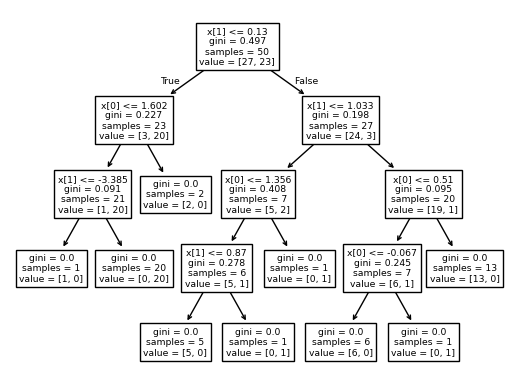

In [25]:
plot_tree(clf2)

[Text(0.4, 0.9, 'x[1] <= -0.18\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.2, 0.7, 'x[0] <= 1.263\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.3, 0.5, 'x[0] <= 1.359\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.7, 'x[0] <= -2.046\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.5, 0.8, '  False'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7, 0.5, 'x[1] <= 1.619\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.8, 0.3, 'x[1] <= 1.863\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

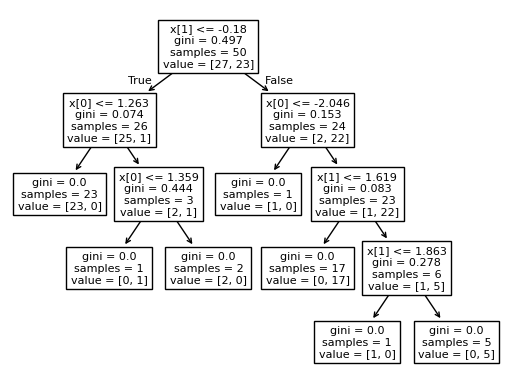

In [26]:
plot_tree(clf3)

In [27]:
clf1.predict(np.array([-1.042498, -0.064323]).reshape(1,2))

C:\Users\sudip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [28]:
clf2.predict(np.array([-1.042498, -0.064323]).reshape(1,2))
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\sudip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sudip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [29]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
81,1.127224,-2.562594,0.062460,1.269359,2.145906,1
18,-0.324022,1.835677,-0.469074,1.300610,-0.799656,1
66,-2.207966,-1.444341,1.684398,-1.985611,0.162779,0
75,-0.877246,0.397661,0.732104,-1.875866,-0.214972,0
19,-0.562888,0.404941,0.216509,-1.023664,-0.025596,0
2,-0.882487,0.827682,0.450042,-0.895122,-0.529684,0
4,-0.483185,0.361146,1.556349,-2.843239,-0.415726,0
99,-0.179640,2.177587,0.463315,-0.394960,-1.453112,0
64,-1.813483,-1.586109,0.142666,-0.667784,1.023935,0
27,3.034596,-4.520021,0.735449,3.993465,0.444895,1
